![Callysto.ca Banner](https://github.com/callysto/curriculum-notebooks/blob/master/callysto-notebook-banner-top.jpg?raw=true)

# River and Lake Water Levels


### Recommended Grade levels: 6-12
<br>

### Instructions
#### “Run” the cells to see the graphs
Click “Cell” and select “Run All”.<br> This will import the data and run all the code, so you can see this week's data visualization. Scroll to the top after you’ve run the cells.<br> 

![instructions](https://github.com/callysto/data-viz-of-the-week/blob/main/images/instructions.png?raw=true)

**You don’t need to do any coding to view the visualizations**.
The plots generated in this notebook are interactive. You can hover over and click on elements to see more information. 

Email contact@callysto.ca if you experience issues.

### About this Notebook

Callysto's Weekly Data Visualization is a learning resource that aims to develop data literacy skills. We provide Grades 5-12 teachers and students with a data visualization, like a graph, to interpret. This companion resource walks learners through how the data visualization is created and interpreted by a data scientist. 

The steps of the data analysis process are listed below and applied to each weekly topic.

1. Question - What are we trying to answer? 
2. Gather - Find the data source(s) you will need. 
3. Organize - Arrange the data, so that you can easily explore it. 
4. Explore - Examine the data to look for evidence to answer the question. This includes creating visualizations. 
5. Interpret - Describe what's happening in the data visualization. 
6. Communicate - Explain how the evidence answers the question. 

# Question

Is water levels in Canada reaching *record* highs?

### Goal
Our goal is to show that water levels in Canada have reached record highs, based on all provinces with lakes and river.s

We will use line graphs to visually represent the data in an informative way. 

# Gather

### Code:
The code below will import the Python programming libraries we need to gather and organize the data to answer our question.

In [20]:
## import libraries
import pandas as pd
import plotly.express as px

### Data:

The Shuswap Lake is a popular and large lake in the Okanagan Region of the province of British Columbia. The water levels of this particular lake fluctuates over the year due to rain fall and snow run off coming from the mountains.

[![Shuswap Lake](https://img.youtube.com/vi/1fJlFh4eJ08/0.jpg)](https://www.youtube.com/watch?v=1fJlFh4eJ08)

### Import the data

In [21]:
# import data
#URL https://dd.weather.gc.ca/hydrometric/
station = "08LE070"
shuswap_data= pd.read_csv(f'https://dd.weather.gc.ca/hydrometric/csv/BC/daily/BC_{station}_daily_hydrometric.csv')
shuswap_data

,ID,Date,Water Level / Niveau d'eau (m),Grade,Symbol / Symbole,QA/QC,Discharge / Débit (cms),Grade.1,Symbol / Symbole.1,QA/QC.1
0,08LE070,2023-05-03T00:00:00-08:00,345.335,NaN,NaN,1,NaN,NaN,NaN,NaN
1,08LE070,2023-05-03T00:05:00-08:00,345.321,NaN,NaN,1,NaN,NaN,NaN,NaN
2,08LE070,2023-05-03T00:10:00-08:00,345.326,NaN,NaN,1,NaN,NaN,NaN,NaN
3,08LE070,2023-05-03T00:15:00-08:00,345.337,NaN,NaN,1,NaN,NaN,NaN,NaN
4,08LE070,2023-05-03T00:20:00-08:00,345.331,NaN,NaN,1,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
8562,08LE070,2023-06-01T17:35:00-08:00,348.394,NaN,NaN,1,NaN,NaN,NaN,NaN
8563,08LE070,2023-06-01T17:40:00-08:00,348.392,NaN,NaN,1,NaN,NaN,NaN,NaN
8564,08LE070,2023-06-01T17:45:00-08:00,348.390,NaN,NaN,1,NaN,NaN,NaN,NaN
8565,08LE070,2023-06-01T17:50:00-08:00,348.389,NaN,NaN,1,NaN,NaN,NaN,NaN


### Comment on the data


In [22]:
#Display the coloumn names
print(*shuswap_data.columns, sep='\n')

 ID
Date
Water Level / Niveau d'eau (m)
Grade
Symbol / Symbole
QA/QC
Discharge / Débit (cms)
Grade.1
Symbol / Symbole.1
QA/QC.1


In [23]:
#Display dataframe by date and water level
shuswap_data[["Date", "Water Level / Niveau d'eau (m)"]]

,Date,Water Level / Niveau d'eau (m)
0,2023-05-03T00:00:00-08:00,345.335
1,2023-05-03T00:05:00-08:00,345.321
2,2023-05-03T00:10:00-08:00,345.326
3,2023-05-03T00:15:00-08:00,345.337
4,2023-05-03T00:20:00-08:00,345.331
...,...,...
8562,2023-06-01T17:35:00-08:00,348.394
8563,2023-06-01T17:40:00-08:00,348.392
8564,2023-06-01T17:45:00-08:00,348.390
8565,2023-06-01T17:50:00-08:00,348.389


In [24]:
from datetime import datetime
from datetime import date
shuswap_data['date_ordinal'] = pd.to_datetime(shuswap_data['Date']).apply(lambda date: date.toordinal())
shuswap_data['date_ordinal']

0       738643
1       738643
2       738643
3       738643
4       738643
         ...  
8562    738672
8563    738672
8564    738672
8565    738672
8566    738672
Name: date_ordinal, Length: 8567, dtype: int64

In [25]:
average_of_dates = shuswap_data.groupby(['date_ordinal'], as_index=False)["Water Level / Niveau d'eau (m)"].mean()

In [26]:
import numpy as np
import matplotlib.pyplot as plt
x_train = average_of_dates['date_ordinal'].to_numpy()
y_train = average_of_dates["Water Level / Niveau d'eau (m)"].to_numpy()
print(f"x_train = {x_train}")
print(f"y_train = {y_train}")

x_train = [738643 738644 738645 738646 738647 738648 738649 738650 738651 738652
 738653 738654 738655 738656 738657 738658 738659 738660 738661 738662
 738663 738664 738665 738666 738667 738668 738669 738670 738671 738672]
y_train = [345.40362847 345.55623611 345.72864583 345.92786458 346.10891319
 346.26048264 346.39061806 346.5123125  346.62134722 346.72294097
 346.82801736 346.98148611 347.12465278 347.27653819 347.43652083
 347.57490972 347.72335764 347.85982292 347.97895833 348.10085417
 348.22118118 348.33196528 348.38182986 348.40454514 348.41715625
 348.43176736 348.43438889 348.44348958 348.42423611 348.39608333]


In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
x_train = x_train.reshape(-1, 1)
poly_reg = PolynomialFeatures(degree = 3)
X_poly = poly_reg.fit_transform(x_train)
lin_reg_2=LinearRegression().fit(X_poly, x_train)

lin_reg_2.coef_

array([[ 0.00000000e+00,  1.50728728e-11,  1.35380742e-06,
        -6.10931510e-13]])

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
x_train = x_train.reshape(-1, 1)
y_train = y_train.reshape(-1 ,1)

poly_reg = PolynomialFeatures(degree = 3)
X_poly = poly_reg.fit_transform(x_train)
lin_reg_2=LinearRegression().fit(X_poly, y_train)

print(lin_reg_2.coef_[0][1])
print(lin_reg_2.intercept_)


3.1831710069453595e-08
[-5.20006253e+08]


c:\Users\calga\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\regression.py:254: RankWarning:

Polyfit may be poorly conditioned

c:\Users\calga\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\algorithms.py:98: RankWarning:

Polyfit may be poorly conditioned

c:\Users\calga\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\algorithms.py:98: RankWarning:

Polyfit may be poorly conditioned

c:\Users\calga\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\algorithms.py:98: RankWarning:

Polyfit may be poorly conditioned

c:\Users\calga\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\algorithms.py:98: RankWarning:

Polyfit may be poorly conditioned

c:\Users\calga\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\algorithms.py:98: RankWarning:

Polyfit may be poorly conditioned

c:\Users\calga\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\algorithms.py:98: RankWarning:

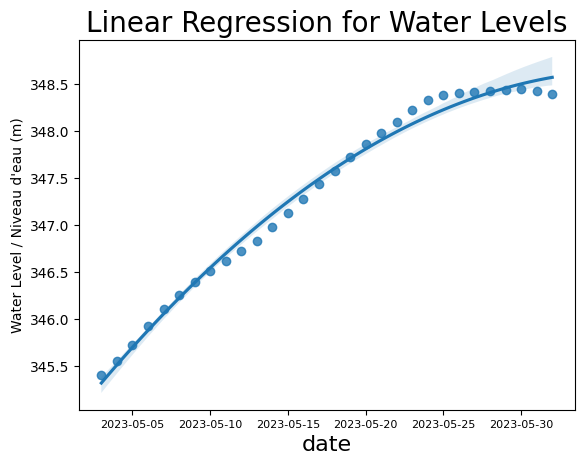

In [29]:
import seaborn as sns
from matplotlib import pyplot as plt

water_pred = sns.regplot(
    data=average_of_dates,
    x='date_ordinal',
    y="Water Level / Niveau d'eau (m)",
    order=3
)

new_labels = [date.fromordinal(int(item)) for item in water_pred.get_xticks()]
water_pred.set_xticklabels(new_labels)

plt.xlabel('date', fontsize=16)
plt.title('Linear Regression for Water Levels', fontsize=20)
plt.tick_params(axis='x', which='major', labelsize=8)

In [30]:
import scipy
slope, intercept, r, p, sterr = scipy.stats.linregress(x=water_pred.get_lines()[0].get_xdata(),
                                                       y=water_pred.get_lines()[0].get_ydata())
print(slope, intercept)

0.11214368875863373 -82488.43351708498


In [31]:
def regression_line(x, slope1, slope2, slope3, intercept):
    return(x**3 * slope3 + x**2 * slope2 + x * slope1 + intercept)

regression_model = pd.DataFrame()
regression_model['predicted_dates'] = average_of_dates['date_ordinal'] + 30
regression_model['predicted_water_levels'] = np.vectorize(regression_line)(regression_model['predicted_dates'], lin_reg_2.coef_[0][1], lin_reg_2.coef_[0][2], lin_reg_2.coef_[0][3], lin_reg_2.intercept_[0])

display(regression_model)

,predicted_dates,predicted_water_levels
0,738673,348.599044
1,738674,348.619701
2,738675,348.634641
3,738676,348.643862
4,738677,348.647366
5,738678,348.645151
6,738679,348.637218
7,738680,348.623567
8,738681,348.604198
9,738682,348.579111


In [39]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=1, cols=2, shared_yaxes=True)

fig.add_trace(
    go.Scatter(x=average_of_dates['date_ordinal'].apply(datetime.fromordinal), y=average_of_dates["Water Level / Niveau d'eau (m)"]),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=regression_model['predicted_dates'].apply(datetime.fromordinal), y=regression_model['predicted_water_levels']),
    row=1, col=2
)

fig.update_layout(title_text="Side By Side Waterlevels and Predicted Waterlevels")
fig.show()

In [33]:
x_train = x_train.flatten()
y_train = y_train.flatten()
fit = np.polyfit(np.log(x_train), y_train, 1)
print(fit)

[   82835.85089942 -1118979.5262222 ]


In [34]:
def logarithmic_reg(x, slope, intercept):
    return(intercept + slope * np.log(x))

log_model = pd.DataFrame()
log_model['predicted_dates'] = average_of_dates['date_ordinal'] + 30
log_model['predicted_water_levels'] = np.vectorize(logarithmic_reg)(log_model['predicted_dates'], fit[0], fit[1])
display(log_model)

,predicted_dates,predicted_water_levels
0,738673,349.071708
1,738674,349.183849
2,738675,349.295990
3,738676,349.408131
4,738677,349.520272
5,738678,349.632413
6,738679,349.744554
7,738680,349.856694
8,738681,349.968834
9,738682,350.080975


In [35]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=1, cols=2, shared_yaxes=True)

fig.add_trace(
    go.Scatter(x=average_of_dates['date_ordinal'].apply(datetime.fromordinal), y=average_of_dates["Water Level / Niveau d'eau (m)"]),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=log_model['predicted_dates'].apply(datetime.fromordinal), y=log_model['predicted_water_levels']),
    row=1, col=2
)

fig.update_layout(title_text="Side By Side Waterlevels and Predicted Waterlevels")
fig.show()

# Visualization for Shuswap Lake Levels

Real time data for the Shuswap Lake

In [36]:
px.line(shuswap_data, x="Date", y="Water Level / Niveau d'eau (m)",title="Shuswap Lake Level")

#insert map of stations here
#https://wateroffice.ec.gc.ca/map/index_e.html

In [37]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster
df = pd.read_csv('https://wateroffice.ec.gc.ca/map/download_e.html?type=real_time&filters=%7B%22station_id%22%3A%22%22%2C%22station_name%22%3A%22%22%2C%22province%22%3A%22all%22%2C%22region%22%3A%22CAN%22%2C%22basin%22%3A%22all%22%2C%22parameter%22%3A%22all%22%2C%22operation_schedule%22%3A%22all%22%2C%22operating_agency%22%3A%22all%22%7D')
latitude = df['Latitude'].mean()
longitude = df['Longitude'].mean()
station_map = folium.Map(location=[latitude,longitude], zoom_start=3)
marker_cluster = MarkerCluster()
for row in df.iterrows():
    marker_cluster.add_child(folium.Marker(location=[row[1]['Latitude'],row[1]['Longitude']], popup=[row[1]['Station Name'], row[1]['Station ID']]))
station_map.add_child(marker_cluster)
station_map

In [ ]:
# province (AB, BC, etc)
province = 'BC'
# station name
station = "07ED001"

In [52]:
## import data
otherwater_data= pd.read_csv(f'https://dd.weather.gc.ca/hydrometric/csv/{province}/daily/{province}_{station}_daily_hydrometric.csv')
otherwater_data

,ID,Date,Water Level / Niveau d'eau (m),Grade,Symbol / Symbole,QA/QC,Discharge / Débit (cms),Grade.1,Symbol / Symbole.1,QA/QC.1
0,07ED001,2023-05-03T00:00:00-08:00,1.028,NaN,NaN,1,32.3,NaN,NaN,1
1,07ED001,2023-05-03T00:05:00-08:00,1.028,NaN,NaN,1,32.3,NaN,NaN,1
2,07ED001,2023-05-03T00:10:00-08:00,1.029,NaN,NaN,1,32.3,NaN,NaN,1
3,07ED001,2023-05-03T00:15:00-08:00,1.030,NaN,NaN,1,32.4,NaN,NaN,1
4,07ED001,2023-05-03T00:20:00-08:00,1.029,NaN,NaN,1,32.3,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...
8560,07ED001,2023-06-01T17:20:00-08:00,2.529,NaN,NaN,1,215.0,NaN,NaN,1
8561,07ED001,2023-06-01T17:25:00-08:00,2.526,NaN,NaN,1,215.0,NaN,NaN,1
8562,07ED001,2023-06-01T17:30:00-08:00,2.524,NaN,NaN,1,214.0,NaN,NaN,1
8563,07ED001,2023-06-01T17:35:00-08:00,2.522,NaN,NaN,1,214.0,NaN,NaN,1


In [ ]:
px.line(otherwater_data, x="Date", y="Water Level / Niveau d'eau (m)",title="Other Water Level")

Comparison of water levels in the Shuswap Lake and other bodies of water

# Communicate
Below we will discuss the results of the data exploration.
(How does our key evidence help answer our question?)

[![Callysto.ca License](https://github.com/callysto/curriculum-notebooks/blob/master/callysto-notebook-banner-bottom.jpg?raw=true)](https://github.com/callysto/curriculum-notebooks/blob/master/LICENSE.md)